In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Esercizio 1
Nel file `covid-19_gen1.txt` è presente l'RNA di un virus SARS-COV-2. L'RNA è una sequenza in cui si alternano 4 simboli (detti nucleotidi): A, T, C, G.
L'RNA del  virus SARS-COV-2 contiene 29903 nucleotidi. Leggi il file e crea un array di Numpy contenente i 29903 elementi, uno per ogni nucleotide secondo l'ordine contenuto nel file.

Utilizza Numpy per:
1. calcolare la frequenza assoluta di ogni nucleotide;
2. calcolare la frequenza assoluta della sequenza A,T,G;
4. sapendo che la sequenza A,T,G,T,T,T,G,T,T,T,T,T sta all'inzio del segmento di RNA che codifica la proteina spike, individuare se la proteina spike è presente nell'RNA: in caso affermativo ottenere la posizione iniziale della proteina spike all'interno dell'array. *SUGGERIMENTO*: costruisci la matrice contenente tutte le possibili sequenze di 12 nucleotidi, nella quale ogni riga rappresenta una sequenza consecutiva di 12 nucleotidi.

In [2]:
lista = []
with open("covid-19_gen1.txt", "r") as f:
    righe = f.readlines()
    for r in righe:
        for i in r[:-1]:
            lista.append(i)
    array = np.array(lista)
    print(array)

['A' 'T' 'T' ... 'A' 'A' 'A']


In [3]:
array_A = array[array == 'A']
array_T = array[array == 'T']
array_C = array[array == 'C']
array_G = array[array == "G"]
print(array_A.shape, array_C.shape, array_G.shape, array_T.shape)

(8954,) (5492,) (5863,) (9594,)


In [4]:
#sequenza = np.array(['A', 'T', 'G'])
sequenza = np.logical_and(array == 'A', np.roll(array, -1) == 'T')
sequenza = np.logical_and(sequenza, np.roll(array, -2) == 'G')
sequenza

array([False, False, False, ..., False, False, False])

In [5]:
lunghezza = array.shape[0]
array_posizioni = np.arange(0, lunghezza)
array_posizioni[sequenza].shape

(725,)

### Esercizio 2
Il file `prezzi.cvs` contiene le serie storiche mensili dei prezzi di alcuni generi alimentari dal Settembre 2011 a Dicembre 2016. Caricare all'interno di opportuni array di Numpy soltanto le serie dei prezzi utili a rispondere alle domande seguenti.

1. Per il periodo Settembre 2011 - Dicembre 2016 calcola il prezzo di una spesa composta da:
    - 5kg di Farina di frumento
    - 1 l di Latte fresco
    - 1 kg di Caffè tostato
    - 0.5 kg di Parmigiano Reggiano
2. Per la spesa del punto 1 calcola se ci sono dei minimi locali nel prezzo e se si quando (anno, mese).

3. Traccia un grafico che mostri l'andamento del prezzo del Caffè tostato (gr. 1000).

4. Calcola un array con le variazioni di prezzo mensile per il Caffè tostato (gr. 1000).

5. Calcola un array con le variazioni di prezzo mensile per il Burro (gr. 1000).

6. Traccia un grafico a dispersione che mostri la variazione di prezzo mensile per il Caffè tostato (gr. 1000) rispetto a quella del Burro (gr. 1000).

In [56]:
f = open("prezzi.csv")
righe = f.readlines()
dati = {"anno":[], "mese":[], "farina":[], "latte":[], "caffe":[], "parmigiano":[], "burro":[]}

In [57]:
for elemento in righe[1:]:
    lista = elemento[:-1].split(";")
    dati["anno"].append(int(lista[0]))
    dati["mese"].append(lista[1])
    dati["burro"].append(float(lista[5]))
    dati["caffe"].append(float(lista[6]))
    dati["farina"].append(float(lista[9]))
    dati["latte"].append(float(lista[11]))
    dati["parmigiano"].append(float(lista[17]))
    
for nome, d in dati.items():
    dati[nome] = np.array(d)
dati

{'anno': array([2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
        2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
        2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014,
        2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
        2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
        2016, 2016, 2016, 2016]),
 'mese': array(['Settembre', 'Ottobre', 'Novembre', 'Dicembre', 'Gennaio',
        'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio',
        'Agosto', 'Settembre', 'Ottobre', 'Dicembre', 'Gennaio',
        'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio',
        'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre',
        'Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno',
        'Luglio', 'Agosto', 'Gennaio', 'Febbraio', 'Marzo', 'Aprile',
        'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre',
        'Novembre', 'Dicembre', 

In [58]:
costo_spesa = np.array(dati["caffe"] * dati["farina"] * 5 * dati["latte"] * 5 * dati["parmigiano"] / 2)
costo_spesa

array([4519.2168    , 4558.772575  , 4335.9869025 , 4254.5412    ,
       4278.82455   , 4314.5136    , 4325.317386  , 4260.0583935 ,
       4397.098446  , 4597.5965    , 4456.27888875, 4423.8894    ,
       4447.6753725 , 4404.028563  , 4254.5412    , 4278.82455   ,
       4314.5136    , 4325.317386  , 4260.0583935 , 4397.098446  ,
       4597.5965    , 4456.27888875, 4423.8894    , 4447.6753725 ,
       4404.028563  , 4473.852801  , 4438.7512455 , 4734.229779  ,
       4607.304685  , 4685.545887  , 4789.11411   , 4662.66948225,
       4618.06186888, 4667.03187925, 4515.5928805 , 4763.05077   ,
       4689.8767785 , 4679.70351   , 4685.900373  , 4578.4454    ,
       4533.14084   , 4345.15104   , 4243.080348  , 4249.211967  ,
       4249.638432  , 4349.7426465 , 4455.68769   , 3741.54225937,
       3872.88706312, 3851.246061  , 3505.44105   , 3481.9146    ,
       3490.84455   , 3490.65005625, 3264.977049  , 3492.3482    ,
       3505.28188   , 3400.13925   , 3389.43015   ])

In [59]:
minimi_locali = np.logical_and(np.roll(costo_spesa, 1) > costo_spesa, np.roll(costo_spesa, -1) > costo_spesa)
minimi_locali

array([False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False, False, False,  True])

In [60]:
array_posizioni = np.arange(0, minimi_locali.shape[0])
array_posizioni[minimi_locali]

array([ 3,  7, 11, 14, 18, 22, 24, 26, 28, 32, 34, 37, 42, 47, 51, 54, 58])

In [61]:
mesi = dati["mese"][array_posizioni]
anni = dati["anno"][array_posizioni]
for i, j in enumerate(mesi):
    print(mesi[i], anni[i])

Settembre 2011
Ottobre 2011
Novembre 2011
Dicembre 2011
Gennaio 2012
Febbraio 2012
Marzo 2012
Aprile 2012
Maggio 2012
Giugno 2012
Luglio 2012
Agosto 2012
Settembre 2012
Ottobre 2012
Dicembre 2012
Gennaio 2013
Febbraio 2013
Marzo 2013
Aprile 2013
Maggio 2013
Giugno 2013
Luglio 2013
Agosto 2013
Settembre 2013
Ottobre 2013
Novembre 2013
Dicembre 2013
Gennaio 2014
Febbraio 2014
Marzo 2014
Aprile 2014
Maggio 2014
Giugno 2014
Luglio 2014
Agosto 2014
Gennaio 2015
Febbraio 2015
Marzo 2015
Aprile 2015
Maggio 2015
Giugno 2015
Luglio 2015
Agosto 2015
Settembre 2015
Ottobre 2015
Novembre 2015
Dicembre 2015
Gennaio 2016
Febbraio 2016
Marzo 2016
Aprile 2016
Maggio 2016
Giugno 2016
Luglio 2016
Agosto 2016
Settembre 2016
Ottobre 2016
Novembre 2016
Dicembre 2016


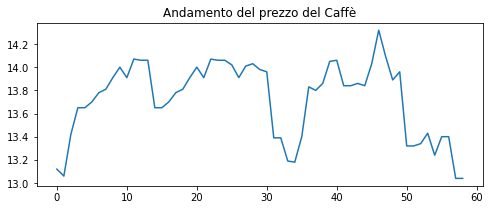

In [62]:
fig, ax = plt.subplots(figsize = (8, 3))
ax.plot(dati["caffe"])
ax.set_title("Andamento del prezzo del Caffè")
plt.show()

In [63]:
variazione_prezzo_caffe = np.array(np.roll(dati["caffe"], 1) - dati["caffe"])
variazione_prezzo_caffe

array([-0.08,  0.06, -0.36, -0.23,  0.  , -0.05, -0.08, -0.03, -0.1 ,
       -0.09,  0.09, -0.16,  0.01,  0.  ,  0.41,  0.  , -0.05, -0.08,
       -0.03, -0.1 , -0.09,  0.09, -0.16,  0.01,  0.  ,  0.04,  0.11,
       -0.1 , -0.02,  0.05,  0.02,  0.57,  0.  ,  0.2 ,  0.01, -0.22,
       -0.43,  0.03, -0.06, -0.19, -0.01,  0.22,  0.  , -0.02,  0.02,
       -0.19, -0.29,  0.23,  0.2 , -0.07,  0.64,  0.  , -0.02, -0.09,
        0.19, -0.16,  0.  ,  0.36,  0.  ])

In [64]:
variazione_prezzo_burro = np.array(np.roll(dati["burro"], 1) - dati["burro"])
variazione_prezzo_burro

array([ 0.04,  0.08,  0.02, -0.19, -0.07,  0.02, -0.15,  0.12, -0.06,
       -0.12, -0.13, -0.04, -0.11, -0.02,  0.56, -0.07,  0.02, -0.15,
        0.12, -0.06, -0.12, -0.13, -0.04, -0.11, -0.02,  0.09, -0.08,
       -0.05, -0.34, -0.15, -0.13,  0.  ,  0.  ,  0.16, -0.06,  0.36,
        0.2 , -0.19, -0.04,  0.  ,  0.1 ,  0.07,  0.  , -0.11, -0.01,
       -0.32,  0.31,  0.22, -0.28,  0.11,  0.36, -0.08, -0.01,  0.11,
        0.33, -0.12,  0.11, -0.03,  0.08])

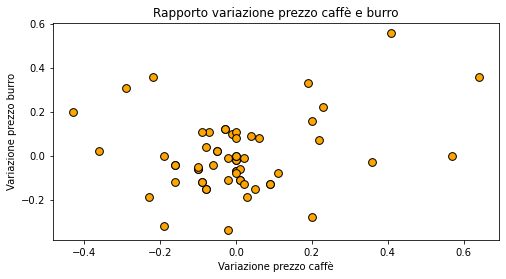

In [74]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(variazione_prezzo_caffe, variazione_prezzo_burro, s = 60, c = "orange", edgecolors='black')
ax.set_xlabel("Variazione prezzo caffè")
ax.set_ylabel("Variazione prezzo burro")
ax.set_title("Rapporto variazione prezzo caffè e burro")
plt.show()

### Esercizio 3
L'array `array_punti` è un array di Numpy come quello sottostante, contenente quattro coppie di coordinate spaziali intere scelte a caso, che rappresentano quattro punti nel piano. Essi sono i quattro vertici di una figura geometrica piana, letti in verso anti-orario. Facendo uso di Numpy:
1. crea una funzione che verifichi se la figura geometrica è un quadrilatero, un triangolo, un segmento oppure un punto;
2. crea una funzione che calcoli il perimetro della figura.

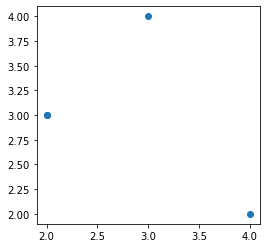

In [2]:
array_punti = np.random.randint(0., 5, (4, 2))
fig, ax = plt.subplots(figsize = (4, 4))
ax.scatter(array_punti[:, 0], array_punti[:, 1])
plt.show()

In [ ]:
def segmento(array):
    if 

In [4]:
def definisci_figura(array):
    if np.allclose(array_punti[:, 0], array_punti[0, 0]) and np.allclose(array_punti[:, 1], array_punti[0, 1]):
        return "Punto"
    elif 

### Esercizio 4 (BONUS)
Usa Numpy per calcolare una approssimazione dell'integrale definito della funzione f(x) = exp(-x^2) da 0 a 1. Suddividi l'intervallo [0,1] in n sotto-intervalli e per ogni sotto-intervallo approssima l'area sottesa dalla funzione con l'area del corrispondente rettangolo.
![rettangoli](rettangolo.png)
Calcola il risultato per n=10, 100, 10000, 100000.

In [12]:
from sympy import *
from sympy.abc import *

In [13]:
init_printing()

In [15]:
f = exp(-x**2)

In [16]:
f

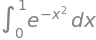

In [18]:
Integral(f, (x, 0, 1))

In [19]:
integrate(f, (x, 0, 1))

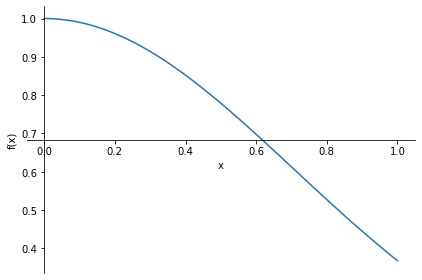

In [20]:
plot(f, (x, 0, 1))